In [101]:
import json
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [102]:
tp='cle_radius.csv'
all_data=pd.read_csv(tp)
df=all_data.drop(['identifier/fips', 'identifier/apn', 'identifier/apnOrig', 'summary/propIndicator', 'summary/proptype','location/geoid', 'identifier/attomId', 'sale/amount/salecode', 'sale/amount/saledisclosuretype', 'address/matchCode', 'address/postal2', 'address/postal3', 'location/accuracy', 'address/country', 'sale/amount/saledocnum', 'summary/propLandUse', 'location/elevation' ], axis=1)
df.dtypes
df2=df.merge(income2, how='inner', on= 'address/postal1')
df

,identifier/obPropId,LotSizeAcres,address/countrySubd,address/line1,address/line2,address/locality,address/oneLine,address/postal1,location/latitude,location/longitude,...,vintage/pubDate,sale/salesearchdate,sale/amount/saleamt,sale/amount/salerecdate,sale/amount/saletranstype,sale/calculation/priceperbed,sale/calculation/pricepersizeunit,sale/saleTransDate,Unnamed: 43,saledays
0,2.170000e+13,8.2130,OH,11024 DOVER RD,"APPLE CREEK, OH 44606",Apple Creek,"11024 DOVER RD, APPLE CREEK, OH 44606",44606,40.724398,-81.784024,...,2018-03-01,2006-10-05,65000,2006-10-05,Resale,10833,16,NaN,NaN,NaN
1,1.830000e+13,1.6500,OH,7651 BUSS RD # A,"APPLE CREEK, OH 44606",Apple Creek,"7651 BUSS RD # A, APPLE CREEK, OH 44606",44606,40.726153,-81.836130,...,2018-01-27,2010-04-16,200000,2010-04-23,Resale,22222,36,2010-04-16,NaN,7
2,2.430000e+13,17.1880,OH,LINCOLN WAY E,"APPLE CREEK, OH 44606",Apple Creek,"LINCOLN WAY E, APPLE CREEK, OH 44606",44606,40.732470,-81.799850,...,2018-03-01,2017-06-19,650000,2017-06-20,Resale,0,0,2017-06-19,NaN,1
3,1.830000e+13,1.3510,OH,18294 JERICHO RD,"DALTON, OH 44618",Dalton,"18294 JERICHO RD, DALTON, OH 44618",44618,40.733698,-81.663290,...,2018-01-27,2013-04-12,54000,2013-04-29,REO (Transfer to Lender),27000,31,2013-04-12,NaN,17
4,2.430000e+13,22.3100,OH,CHIPPEWA RD,"APPLE CREEK, OH 44606",Apple Creek,"CHIPPEWA RD, APPLE CREEK, OH 44606",44606,40.732470,-81.799850,...,2018-03-01,2016-08-02,142800,2016-08-04,Resale,0,0,2016-08-02,NaN,2
5,1.830000e+13,0.7570,OH,5353 MILLERSBURG RD,"WOOSTER, OH 44691",Wooster,"5353 MILLERSBURG RD, WOOSTER, OH 44691",44691,40.731927,-81.939383,...,2018-11-26,2018-10-03,164000,2018-10-05,Resale,54667,143,2018-10-03,NaN,2
6,1.530000e+13,1.4090,OH,13887 JERICHO RD,"DALTON, OH 44618",Dalton,"13887 JERICHO RD, DALTON, OH 44618",44618,40.737662,-81.733552,...,2018-03-01,2017-06-15,48400,2017-06-19,Resale,16133,37,2017-06-15,NaN,4
7,2.430000e+13,7.8540,OH,4797 MILLERSBURG RD,"WOOSTER, OH 44691",Wooster,"4797 MILLERSBURG RD, WOOSTER, OH 44691",44691,40.740747,-81.932523,...,2018-03-01,2012-10-17,50000,2012-10-22,Resale,0,0,2012-10-17,NaN,5
8,1.830000e+13,25.9750,OH,3610 FREDERICKSBURG RD,"APPLE CREEK, OH 44606",Apple Creek,"3610 FREDERICKSBURG RD, APPLE CREEK, OH 44606",44606,40.732470,-81.799850,...,2018-03-01,2015-10-29,250000,2015-10-30,Resale,0,0,2015-10-29,NaN,1
9,1.830000e+13,0.4330,OH,4361 KIDRON RD,"KIDRON, OH 44636",Kidron,"4361 KIDRON RD, KIDRON, OH 44636",44636,40.741840,-81.745150,...,2018-09-28,2018-08-09,65000,2018-08-14,Resale,32500,37,2018-08-09,NaN,5


In [103]:
map=df.loc[:,['address/line1', 'address/locality', 'address/countrySubd', 'address/postal1', "sale/amount/saleamt", 'sale/amount/salerecdate', 'location/latitude', 'location/longitude']]
maps=map.rename(columns={'address/line1': 'street_1', 'address/locality': 'city', 'address/countrySubd': 'state', 'address/postal1': 'zip', 'sale/amount/saleamt': 'sale_price', 'sale/amount/salerecdate': 'date', 'location/latitude': 'latitude', 'location/longitude':'longitude'}) 
map5=maps.dropna(how='any')

map5.to_csv('map5.csv')

Text(0.5, 1.0, 'Distribution of households')

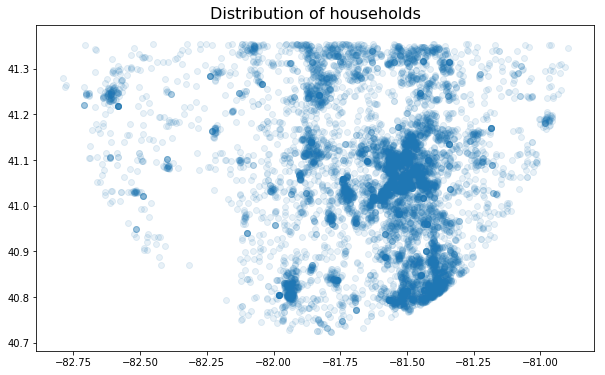

In [104]:

plt.figure(figsize=(10,6))
plt.scatter(df2['location/longitude'],y=df2['location/latitude'],alpha=0.1)
plt.title("Distribution of households",size=16)

In [105]:
house=pd.read_csv('house.csv', dtype={'name': int, 'med/housing':int })
house1=house.drop(['geoid', 'B25077001, Error'], axis=1)
house2=house1.rename(columns={'name': 'address/postal1'})
houses=house2.iloc[1:]
houses2=houses.loc[houses["med/housing"] > 1, :]


In [106]:
dem=pd.read_csv('demo.csv', dtype={'1':float, 'total':int, 'address/postal1':int, '2':int, '3':int, '4':int})
dem2=dem.iloc[1:]
dem3=dem2.loc[:, ["address/postal1", "total", "1", "2", "3", "4"]]
dem3['1per']=(dem3['1']/dem3['total'])*100
dem3['2per']=(dem3['2']/dem3['total'])*100
dem3['4per']=(dem3['4']/dem3['total'])*100


In [107]:
pop=pd.read_csv('pop.csv', dtype={'population':float, 'address/postal1':int})
pop2=pop.iloc[1:]
pop3=pop2.loc[:, ["address/postal1", "population" ]]


In [108]:
edu=pd.read_csv('education.csv', dtype={'total':float, 'address/postal1':int, 'Bachelors':int, 'Masters':int, 'HighSchool':int, 'Associates':int, 'Professional':int, 'Doctorate':int})
edu2=edu.iloc[1:]
edu3=edu2.loc[:, ["address/postal1", "total", "Bachelors", "Masters", "HighSchool", "Associates", "Professional", "Doctorate"]]
edu3['bachper']=(edu3['Bachelors']/edu3['total'])*100
edu3['docper']=(edu3['Doctorate']/edu3['total'])*100
edu3['mastper']=(edu3['Masters']/edu3['total'])*100
edu3['HSper']=(edu3['HighSchool']/edu3['total'])*100

In [109]:


age=pd.read_csv('age.csv', dtype={'total':float, 'address/postal1':int})
age2=age.iloc[1:]
age3=age2.drop(['geoid', 'B01002000.5', 'B01002000.5, Error', 'B01002001, Error', 'male', 'female', 'B01002002, Error', 'B01002003, Error'], axis=1)


In [110]:
merge1=dem3.merge(pop3, how='inner', on='address/postal1' )
merge2=merge1.merge(edu3, how='outer', on='address/postal1')
merge3=merge2.merge(age3, how='inner', on='address/postal1')
merge3.head()

,address/postal1,total_x,1,2,3,4,1per,2per,4per,population,...,Masters,HighSchool,Associates,Professional,Doctorate,bachper,docper,mastper,HSper,total
0,16159,4824,4703.0,11,0,13,97.491708,0.228027,0.269486,4824.0,...,237,1571,316,0,0,13.741110,0.000000,6.742532,44.694168,47.3
1,43001,2890,2782.0,0,0,0,96.262976,0.000000,0.000000,2890.0,...,162,659,134,28,8,21.461657,0.411734,8.337622,33.916624,39.3
2,43002,3238,3020.0,98,0,97,93.267449,3.026560,2.995676,3238.0,...,298,221,431,109,11,41.672426,0.380097,10.297167,7.636489,32.7
3,43003,2895,2836.0,0,0,2,97.962003,0.000000,0.069085,2895.0,...,72,835,165,8,9,13.473787,0.440960,3.527683,40.911318,41.3
4,43004,25768,17174.0,6538,0,1092,66.648556,25.372555,4.237814,25768.0,...,1765,2887,1355,409,171,30.537597,0.995981,10.280156,16.815190,34.9


In [111]:
food_stamp=pd.read_csv('fs.csv', dtype={'PA/FS': int, 'NO_PA/FS':int, 'address/postal1':int})
fs=food_stamp.drop(['geoid', 'B19058001, Error', 'B19058002, Error', 'B19058003, Error'], axis=1)
fs['perc_fs']=(fs['PA/FS']/fs['B19058001'])*100
fs1=fs.drop(['B19058001'], axis=1)
fs2=fs1.iloc[1:]


In [112]:
med_inc2=pd.read_csv('medianincome.csv', dtype={'zipcode': int, 'median':int})
med_inc=med_inc2.rename(columns={'zipcode': 'address/postal1', 'median': 'median_income'})
income=med_inc.drop(['geoid', 'B19013001, Error'], axis=1)
income2 = income.iloc[1:]


In [113]:
df_res= df.loc[df["summary/propclass"] == "Single Family Residence / Townhouse", :]
b=df_res['address/postal1'].unique()
dataframe2=pd.DataFrame(b, columns=['zip'])


In [114]:
e=df_res['address/locality'].unique()
dataframe=pd.DataFrame(e, columns=['a'])
dataframe.to_csv("crime2.csv")

In [115]:
df_r=pd.read_csv('desc_df2.csv')


In [116]:
df_r['identifier/obPropId'].astype(str)
ids=df_r['identifier/obPropId'].tolist()


In [117]:
desc_df = df_res.sort_values("sale/amount/salerecdate", ascending=False)
desc_df2=desc_df.iloc[0:1000, :]
#desc_df2.to_csv('desc_df.csv')


In [118]:
desc_df3=desc_df2.loc[desc_df2["summary/yearbuilt"] > 1, :]

In [119]:
desc_http://localhost:8888/notebooks/Desktop/New%20folder/reeeee.ipynb#df4=desc_df3.loc[desc_df3["sale/amount/saleamt"] > 5000, :]

SyntaxError: invalid syntax (<ipython-input-119-be9c6a6a9493>, line 1)

In [120]:
desc_df5=desc_df4.loc[desc_df4['building/rooms/bathstotal'] > 0, :]

In [121]:
desc_df6=desc_df5.merge(income2, how='inner', on= 'address/postal1')

In [122]:
desc_df7=desc_df6.loc[desc_df6["median_income"] > 1, :]

In [123]:
desc_df8=desc_df7.loc[desc_df7["sale/amount/saleamt"] < 700000, :]

In [124]:
desc_df9=desc_df8.merge(fs2, how='inner', on='address/postal1')


In [125]:
desc_df10=desc_df9.merge(houses2, how='inner', on='address/postal1')

In [126]:
desc_df11=desc_df10.merge(merge3, how='inner', on='address/postal1')

In [127]:
desc_df12=desc_df11.loc[desc_df11["population"] > 1, :]

In [128]:
desc_df13=desc_df12.loc[desc_df12["location/distance"] < 45, :]

In [129]:
desc_df14=desc_df13.loc[desc_df13["LotSizeAcres"] > 0.0000, :]

In [130]:
desc_df15=desc_df14.loc[desc_df14['building/rooms/bathstotal'] < 7, :]

In [131]:
desc_df16=desc_df15.loc[desc_df15['LotSizeAcres'] < 1 , :]

In [132]:
desc_df17=desc_df16.loc[desc_df16['med/housing'] < 400000 , :]

In [133]:
desc_df18=desc_df17.loc[desc_df17["perc_fs"] > 5, :]
desc_df18

,identifier/obPropId,LotSizeAcres,address/countrySubd,address/line1,address/line2,address/locality,address/oneLine,address/postal1,location/latitude,location/longitude,...,Masters,HighSchool,Associates,Professional,Doctorate,bachper,docper,mastper,HSper,total
0,1.830000e+13,0.2251,OH,4300 BUTTERFLY CIR,"MEDINA, OH 44256",Medina,"4300 BUTTERFLY CIR, MEDINA, OH 44256",44256,41.202632,-81.840360,...,4064,10402,3829,762,410,26.251726,0.959715,9.512886,24.348681,41.8
1,1.830000e+13,0.7800,OH,500 MEDINA RD,"MEDINA, OH 44256",Medina,"500 MEDINA RD, MEDINA, OH 44256",44256,41.135813,-81.702880,...,4064,10402,3829,762,410,26.251726,0.959715,9.512886,24.348681,41.8
2,2.310000e+12,0.1417,OH,408 E NORTH ST,"MEDINA, OH 44256",Medina,"408 E NORTH ST, MEDINA, OH 44256",44256,41.141974,-81.858376,...,4064,10402,3829,762,410,26.251726,0.959715,9.512886,24.348681,41.8
5,1.830000e+13,0.3100,OH,3922 BOXELDER DR,"MEDINA, OH 44256",Medina,"3922 BOXELDER DR, MEDINA, OH 44256",44256,41.169614,-81.874662,...,4064,10402,3829,762,410,26.251726,0.959715,9.512886,24.348681,41.8
6,2.460000e+12,0.2397,OH,454 W PARK BLVD,"MEDINA, OH 44256",Medina,"454 W PARK BLVD, MEDINA, OH 44256",44256,41.128303,-81.871823,...,4064,10402,3829,762,410,26.251726,0.959715,9.512886,24.348681,41.8
7,4.590000e+12,0.1600,OH,364 ABBEYVILLE RD,"MEDINA, OH 44256",Medina,"364 ABBEYVILLE RD, MEDINA, OH 44256",44256,41.144264,-81.892763,...,4064,10402,3829,762,410,26.251726,0.959715,9.512886,24.348681,41.8
8,1.830000e+13,0.3753,OH,1035 BURNTWOOD DR,"MEDINA, OH 44256",Medina,"1035 BURNTWOOD DR, MEDINA, OH 44256",44256,41.133857,-81.839452,...,4064,10402,3829,762,410,26.251726,0.959715,9.512886,24.348681,41.8
12,1.470000e+13,0.2984,OH,227 GRANT ST,"MEDINA, OH 44256",Medina,"227 GRANT ST, MEDINA, OH 44256",44256,41.131397,-81.861473,...,4064,10402,3829,762,410,26.251726,0.959715,9.512886,24.348681,41.8
13,2.510000e+12,0.7100,OH,4405 LAKEVIEW GLEN DR,"MEDINA, OH 44256",Medina,"4405 LAKEVIEW GLEN DR, MEDINA, OH 44256",44256,41.102768,-81.846885,...,4064,10402,3829,762,410,26.251726,0.959715,9.512886,24.348681,41.8
15,1.830000e+13,0.5845,OH,168 KOONS AVE,"MEDINA, OH 44256",Medina,"168 KOONS AVE, MEDINA, OH 44256",44256,41.124658,-81.867365,...,4064,10402,3829,762,410,26.251726,0.959715,9.512886,24.348681,41.8


In [134]:
desc_df19=desc_df18.merge(df, how='inner', on='address/oneLine')
desc_df19

,identifier/obPropId_x,LotSizeAcres_x,address/countrySubd_x,address/line1_x,address/line2_x,address/locality_x,address/oneLine,address/postal1_x,location/latitude_x,location/longitude_x,...,vintage/pubDate_y,sale/salesearchdate_y,sale/amount/saleamt_y,sale/amount/salerecdate_y,sale/amount/saletranstype_y,sale/calculation/priceperbed_y,sale/calculation/pricepersizeunit_y,sale/saleTransDate_y,Unnamed: 43_y,saledays_y
0,1.830000e+13,0.2251,OH,4300 BUTTERFLY CIR,"MEDINA, OH 44256",Medina,"4300 BUTTERFLY CIR, MEDINA, OH 44256",44256,41.202632,-81.840360,...,2019-06-03,2019-05-16,205000,2019-05-17,Resale,68333,146,2019-05-16,NaN,1
1,1.830000e+13,0.7800,OH,500 MEDINA RD,"MEDINA, OH 44256",Medina,"500 MEDINA RD, MEDINA, OH 44256",44256,41.135813,-81.702880,...,2019-06-03,2019-05-13,119000,2019-05-15,Resale,59500,101,2019-05-13,NaN,2
2,2.310000e+12,0.1417,OH,408 E NORTH ST,"MEDINA, OH 44256",Medina,"408 E NORTH ST, MEDINA, OH 44256",44256,41.141974,-81.858376,...,2019-05-24,2019-05-02,112000,2019-05-06,Resale,37333,95,2019-05-02,NaN,4
3,1.830000e+13,0.3100,OH,3922 BOXELDER DR,"MEDINA, OH 44256",Medina,"3922 BOXELDER DR, MEDINA, OH 44256",44256,41.169614,-81.874662,...,2018-12-21,2018-11-28,222500,2018-12-03,Resale,74167,121,2018-11-28,NaN,5
4,2.460000e+12,0.2397,OH,454 W PARK BLVD,"MEDINA, OH 44256",Medina,"454 W PARK BLVD, MEDINA, OH 44256",44256,41.128303,-81.871823,...,2018-12-07,2018-11-15,125900,2018-11-16,Resale,41967,154,2018-11-15,NaN,1
5,4.590000e+12,0.1600,OH,364 ABBEYVILLE RD,"MEDINA, OH 44256",Medina,"364 ABBEYVILLE RD, MEDINA, OH 44256",44256,41.144264,-81.892763,...,2018-12-07,2018-11-13,162500,2018-11-15,Resale,54167,111,2018-11-13,NaN,2
6,1.830000e+13,0.3753,OH,1035 BURNTWOOD DR,"MEDINA, OH 44256",Medina,"1035 BURNTWOOD DR, MEDINA, OH 44256",44256,41.133857,-81.839452,...,2018-09-07,2018-08-15,174000,2018-08-17,Resale,58000,153,2018-08-15,NaN,2
7,1.470000e+13,0.2984,OH,227 GRANT ST,"MEDINA, OH 44256",Medina,"227 GRANT ST, MEDINA, OH 44256",44256,41.131397,-81.861473,...,2018-07-16,2018-06-22,127500,2018-06-25,Resale,42500,100,2018-06-22,NaN,3
8,2.510000e+12,0.7100,OH,4405 LAKEVIEW GLEN DR,"MEDINA, OH 44256",Medina,"4405 LAKEVIEW GLEN DR, MEDINA, OH 44256",44256,41.102768,-81.846885,...,2018-07-16,2018-06-21,445000,2018-06-22,Resale,148333,142,2018-06-21,NaN,1
9,1.830000e+13,0.5845,OH,168 KOONS AVE,"MEDINA, OH 44256",Medina,"168 KOONS AVE, MEDINA, OH 44256",44256,41.124658,-81.867365,...,2018-06-15,2018-05-02,180000,2018-05-29,Resale,60000,134,2018-05-02,NaN,27


In [147]:
SML=desc_df19.loc[:, ["LotSizeAcres_y", "med/housing", "median_income", "HSper", "bachper", "total_y", "perc_fs", "summary/yearbuilt_y", "mastper", "building/rooms/bathstotal_y", "population", "saledays_y", "building/rooms/beds_y", "sale/amount/saleamt_y"]]
SML.head()

,LotSizeAcres_y,med/housing,median_income,HSper,bachper,total_y,perc_fs,summary/yearbuilt_y,mastper,building/rooms/bathstotal_y,population,saledays_y,building/rooms/beds_y,sale/amount/saleamt_y
0,0.2251,201200,76741,24.348681,26.251726,42721.0,6.650361,2013,9.512886,3.0,62656.0,1,3,205000
1,0.7800,201200,76741,24.348681,26.251726,42721.0,6.650361,1860,9.512886,1.0,62656.0,2,2,119000
2,0.1417,201200,76741,24.348681,26.251726,42721.0,6.650361,1955,9.512886,1.0,62656.0,4,3,112000
3,0.3100,201200,76741,24.348681,26.251726,42721.0,6.650361,1994,9.512886,3.0,62656.0,5,3,222500
4,0.2397,201200,76741,24.348681,26.251726,42721.0,6.650361,1956,9.512886,1.0,62656.0,1,3,125900


In [148]:
corr_matrix=SML.corr()
corr_matrix["saledays_y"].sort_values(ascending=False)

KeyError: 'saledays_y'

In [135]:
ML_df=desc_df18.loc[:, ["LotSizeAcres", "med/housing", "median_income", "HSper", "bachper", "total", "perc_fs", "summary/yearbuilt", "mastper", "building/rooms/bathstotal", "population", "saledays", "building/rooms/beds", "sale/amount/saleamt"]]
ML_df.to_csv('ML.csv')
ML_df['difference_house']=ML_df['sale/amount/saleamt']-ML_df['med/housing']
ML_df['year_b2']=2019-ML_df['summary/yearbuilt']
ML_df.describe()

,LotSizeAcres,med/housing,median_income,HSper,bachper,total,perc_fs,summary/yearbuilt,mastper,building/rooms/bathstotal,population,building/rooms/beds,sale/amount/saleamt,difference_house,year_b2
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,0.276872,122172.600349,51121.867365,31.400629,16.538085,40.249738,17.003892,1956.118674,6.231008,1.862129,25792.923211,3.071553,128483.106457,6310.506108,62.881326
std,0.196382,45176.383532,15425.838958,6.100020,7.344075,4.515260,10.845229,31.458818,3.561751,0.921867,13013.472612,0.714567,96617.260497,78865.196062,31.458818
min,0.033100,51200.000000,19026.000000,15.138282,2.977083,21.000000,5.120482,1860.000000,0.000000,1.000000,1141.000000,1.000000,7000.000000,-193600.000000,1.000000
25%,0.129500,75600.000000,36992.000000,27.065483,10.959156,37.400000,7.547915,1928.000000,3.110283,1.000000,17878.000000,3.000000,52500.000000,-39200.000000,41.000000
50%,0.205700,121900.000000,50642.000000,31.924145,14.697802,41.100000,13.484757,1955.000000,5.549879,2.000000,22586.000000,3.000000,113000.000000,-8700.000000,64.000000
75%,0.367100,157700.000000,63915.000000,36.309551,22.620749,43.900000,25.367009,1978.000000,8.926496,2.000000,31507.000000,3.000000,172500.000000,36600.000000,91.000000
max,0.990000,238700.000000,87639.000000,45.398267,32.203578,48.200000,53.423423,2018.000000,15.152024,5.000000,63572.000000,6.000000,514810.000000,359000.000000,159.000000


In [35]:
corr_matrix=ML_df.corr()
corr_matrix['sale/amount/saleamt'].sort_values(ascending=False)

sale/amount/saleamt          1.000000
difference_house             0.886757
building/rooms/bathstotal    0.680148
summary/yearbuilt            0.596530
med/housing                  0.590641
median_income                0.576004
mastper                      0.558371
bachper                      0.540943
LotSizeAcres                 0.431404
building/rooms/beds          0.366743
total                        0.301049
population                   0.246712
2per                        -0.394922
HSper                       -0.398914
perc_fs                     -0.539153
year_b2                     -0.596530
Name: sale/amount/saleamt, dtype: float64

In [36]:
ML_df1['sale/amount/saleamt'].apply(lambda x: np.log1p(x)**2).hist(bins=50,label='a')
plt.legend()
logY=ML_df['sale/amount/saleamt'].apply(lambda x: np.log1p(x)**2)

NameError: name 'ML_df1' is not defined

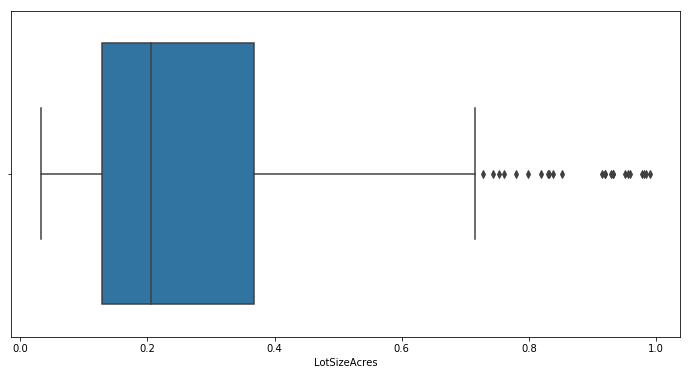

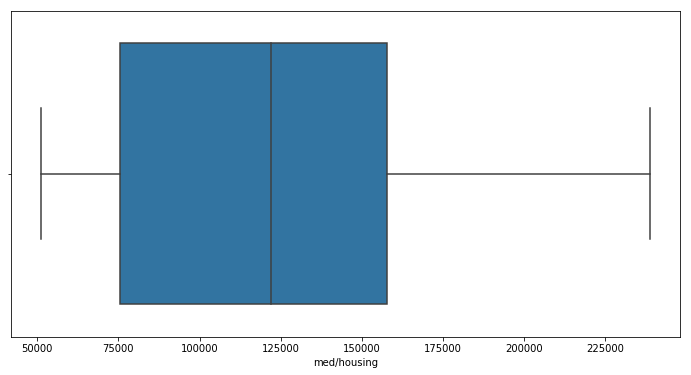

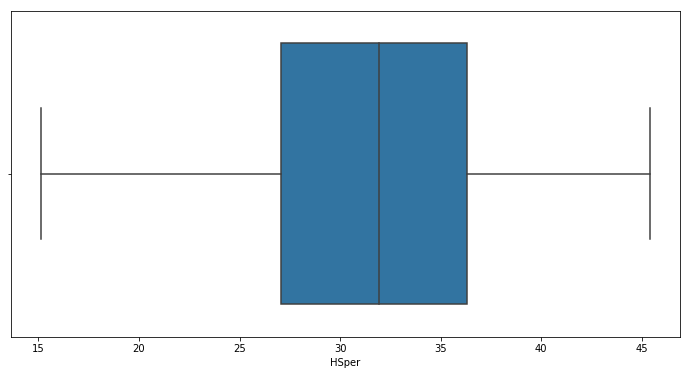

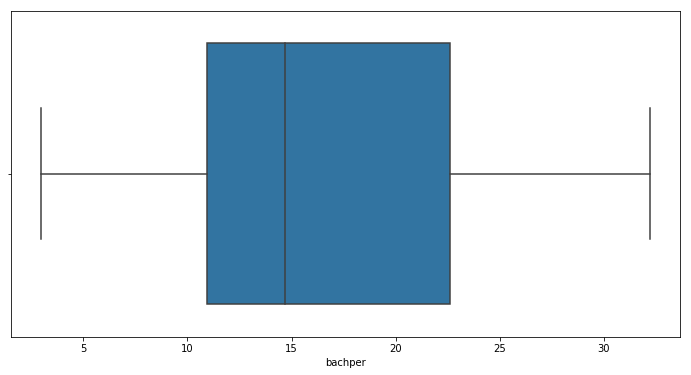

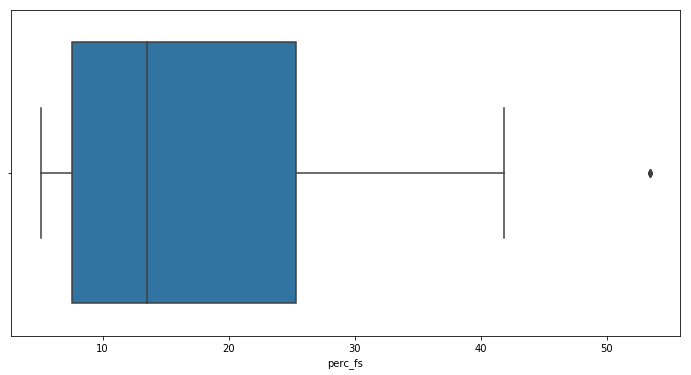

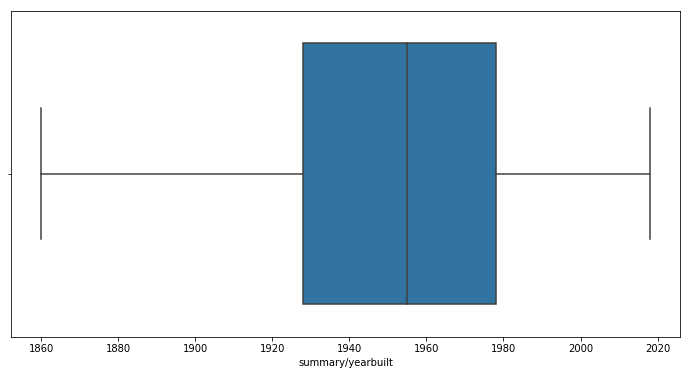

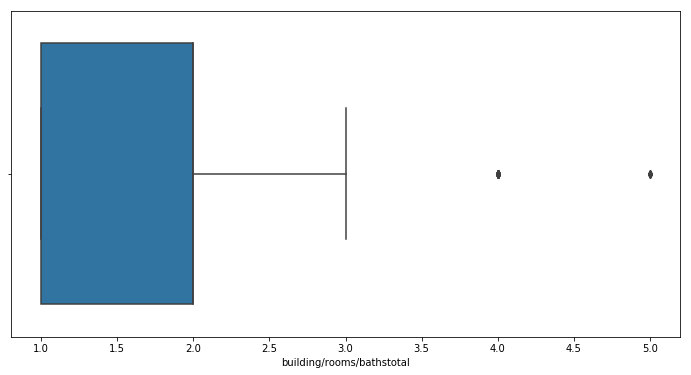

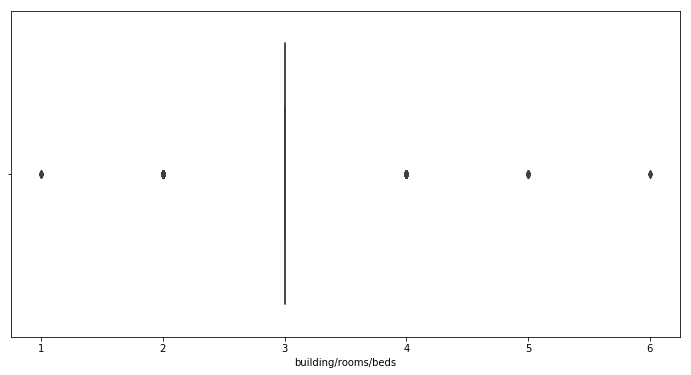

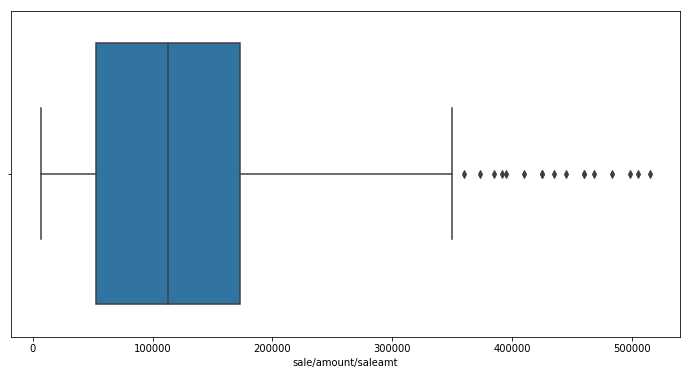

In [37]:
import seaborn as sns
num_features=["LotSizeAcres", "med/housing", "HSper", "bachper", "perc_fs", "summary/yearbuilt", "building/rooms/bathstotal", "building/rooms/beds", "sale/amount/saleamt"]
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=ML_df,ax=ax)

In [38]:
ML_df1=ML_df.copy()
skewness=[]
for i in num_features:
    skewness.append(ML_df1[i].skew())
pd.DataFrame(data=skewness,index=num_features,columns=['skewness']).sort_values(by='skewness',ascending=False)


,skewness
LotSizeAcres,1.488801
sale/amount/saleamt,1.277744
perc_fs,1.037751
building/rooms/bathstotal,0.841006
bachper,0.444602
building/rooms/beds,0.269724
med/housing,0.243367
summary/yearbuilt,0.087316
HSper,-0.424194


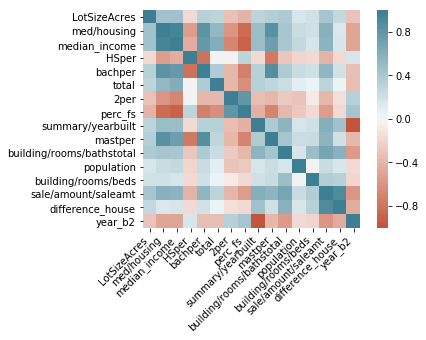

In [39]:
corr = ML_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [40]:
X = ML_df[["med/housing", "summary/yearbuilt", "perc_fs", "building/rooms/bathstotal", "HSper", "LotSizeAcres", "building/rooms/beds"]]
y = ML_df["sale/amount/saleamt"].values.reshape(-1, 1)
print(X.shape, y.shape)
y2=logY.values.reshape(-1, 1) 

(573, 7) (573, 1)


NameError: name 'logY' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [507]:
inputs=[[5, 5, 55, 5, 5, 5, 5]]
df = pd.DataFrame(inputs)
X = df.iloc[:,:]
X

,0,1,2,3,4,5,6
0,5,5,55,5,5,5,5


In [508]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\emhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\emhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\emhar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\emhar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [509]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [510]:
pickle.dump(model, open('model.pkl','wb'))

In [511]:
# Fit the model to the training data and calculate the scores for the training and testing data


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6019398527564572
Testing Score: 0.6745814868651943


In [512]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION
training_score = model.score(X_train_scaled, y_train_scaled)


print(f"Training Score: {training_score}")

print(f"MSE: {MSE}, testing: {r2}")

Training Score: 0.6019398527564572
MSE: 0.35473592232007456, testing: 0.6722467001400958


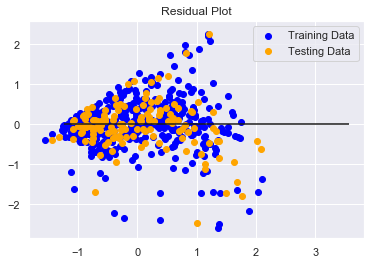

In [513]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [514]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.35220892191244324, R2: 0.6745814868651943


In [515]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train_scaled ,y_train_scaled)
model.best_params_


C:\Users\emhar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 9}

In [516]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=8)
neigh.fit(X_train_scaled, y_train_scaled)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=8, p=2,
          weights='uniform')

In [517]:
training_score = neigh.score(X_train_scaled, y_train_scaled)
testing_score = neigh.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6584385023240279
Testing Score: 0.6584745684789727


In [518]:
MSE2 = mean_squared_error(y_test_scaled, neigh.predict(X_test_scaled))
print(MSE2)

0.3696418586728444


In [525]:
from sklearn.ensemble import RandomForestRegressor 

  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 700, min_samples_split= 5, min_samples_leaf= 2, max_depth=20, random_state=66) 
  
# fit the regressor with x and y data 
regressor.fit(X_train_scaled, y_train_scaled.ravel())   

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
           oob_score=False, random_state=66, verbose=0, warm_start=False)

In [526]:
pickle.dump(regressor, open('regressor.pkl','wb'))   

In [520]:
training_score = regressor.score(X_train_scaled, y_train_scaled)
testing_score = regressor.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8821490927723213
Testing Score: 0.6771752587157917


In [521]:
data = ML_df[["LotSizeAcres", "med/housing", "perc_fs", "median_income", "bachper", "summary/yearbuilt", "building/rooms/bathstotal", "building/rooms/beds"]]

print(X.shape, y.shape)
feature_names = data.columns
sorted(zip(regressor.feature_importances_, feature_names), reverse=True)

(1, 7) (573, 1)


[(0.34705121795204336, 'median_income'),
 (0.22827131926960054, 'med/housing'),
 (0.13342542261628323, 'LotSizeAcres'),
 (0.11196432115242003, 'summary/yearbuilt'),
 (0.10811512727056487, 'bachper'),
 (0.05478130368335671, 'perc_fs'),
 (0.01639128805573141, 'building/rooms/bathstotal')]

In [468]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [481]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train_scaled, y_train_scaled.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [50, 266, 483, 700, 916, 1133, 1350, 1566, 1783, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [470]:
rf_random.best_params_

In [471]:
#explore api options
import http.client 

conn = http.client.HTTPSConnection("api.gateway.attomdata.com") 

headers = { 
    'accept': "application/json", 
    'apikey': "487ac4986deb86031b6d88f9505dfdc6", 
} 

ids="18471319108031"
conn.request("GET", "/propertyapi/v1.0.0/property/detail?id="+ ids, headers=headers) 

res = conn.getresponse() 
data = res.read() 

data1=data.decode("utf-8")
print(data1)

{"status":{"version":"1.0.0","code":0,"msg":"SuccessWithResult","total":1,"page":1,"pagesize":10},"property":[{"identifier":{"obPropId":18471319108031,"fips":"08031","apn":"0219204018000","apnOrig":"219204018000","attomId":184713191},"lot":{"depth":0,"frontage":0,"lotnum":"31","lotsize1":0.1077,"lotsize2":4690,"pooltype":"NONE"},"area":{"blockNum":"36","countrysecsubd":"Denver County","countyuse1":"113","muncode":"DE","munname":"DENVER","srvyRange":"68W","srvySection":"19","srvyTownship":"03S","subdname":"BERKELEY","subdtractnum":"0","taxcodearea":"0"},"address":{"country":"US","countrySubd":"CO","line1":"4529 WINONA CT","line2":"DENVER, CO 80212","locality":"Denver","matchCode":"ExaStr","oneLine":"4529 WINONA CT, DENVER, CO 80212","postal1":"80212","postal2":"2512","postal3":"C037"},"location":{"accuracy":"Street","elevation":0.0,"latitude":"39.778904","longitude":"-105.047624","distance":0.0,"geoid":"CO08031, CS0891007, DB0803360, MT30001324, ND0000119198, ND0000539537, PL0820000, SB

In [472]:
import numpy
import pandas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [473]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# define base model
def baseline_model():
    #create model
    model = Sequential()
    model.add(Dense(11, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
# Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=2)

In [474]:

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X_train_scaled, y_train_scaled, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

C:\Users\emhar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Error when checking input: expected dense_input to have shape (11,) but got array with shape (7,)

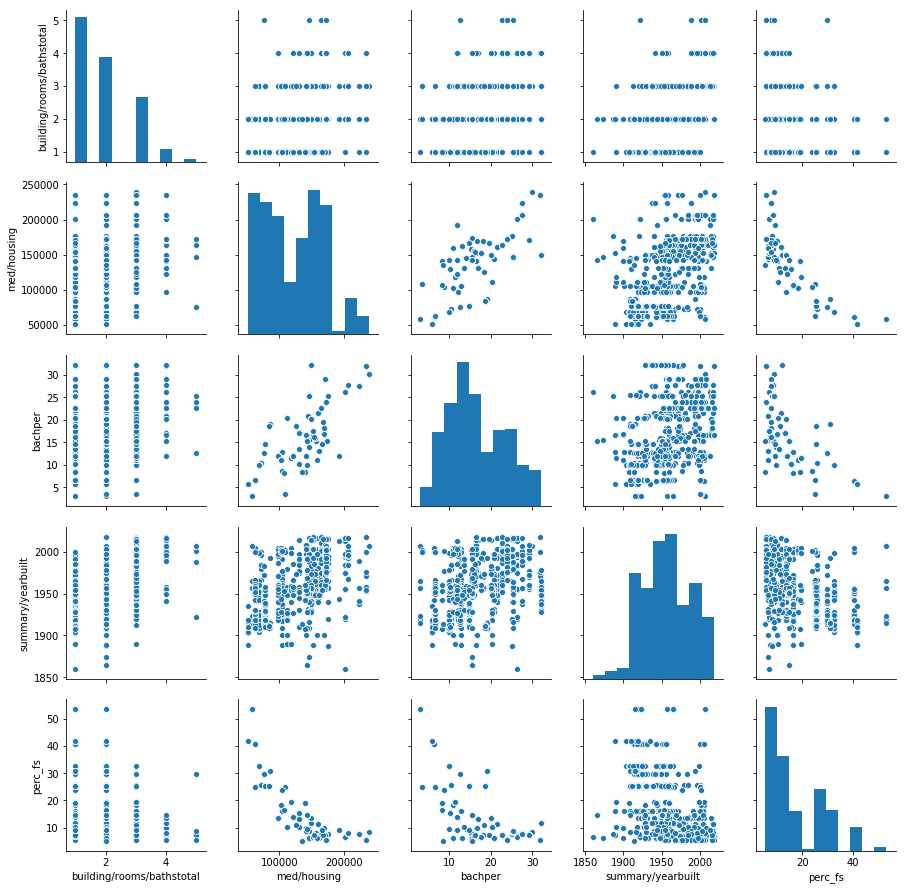

In [159]:
import seaborn as sns
sns.pairplot(ML_df[['building/rooms/bathstotal','med/housing','bachper','summary/yearbuilt', 'perc_fs']])

In [475]:
ML_df.columns

Index(['LotSizeAcres', 'med/housing', 'median_income', 'HSper', 'bachper',
       'total', '2per', 'perc_fs', 'summary/yearbuilt', 'mastper',
       'building/rooms/bathstotal', 'population', 'building/rooms/beds',
       'sale/amount/saleamt', 'difference_house', 'year_b2'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C27FEA5550>,
      dtype=object)

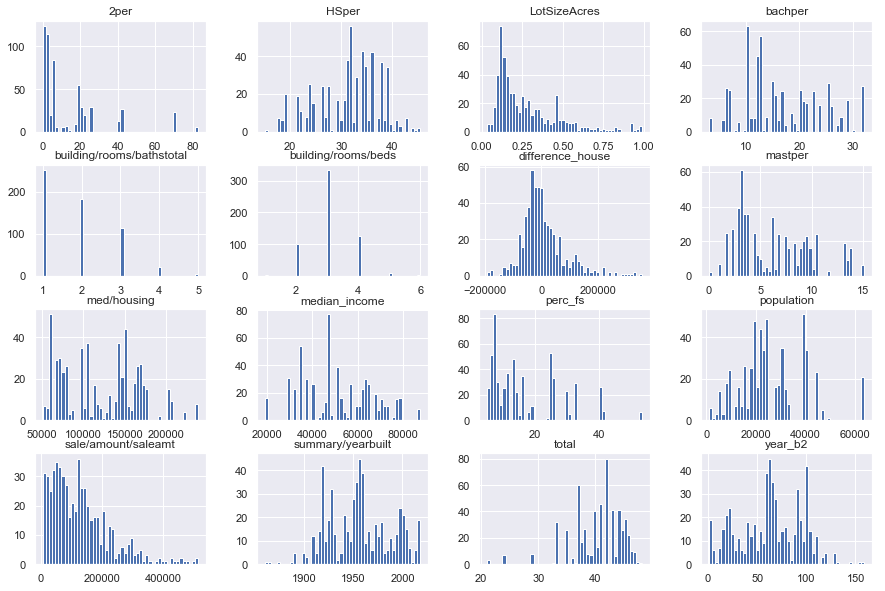

In [477]:
ML_df.hist(bins=50,figsize=(15,10))